# Dogs vs Cats - Part 1

Classify whether images contain either a dog or a cat. Download the data from: https://www.kaggle.com/c/dogs-vs-cats/data

The dataset contains 25,000 images of dogs and cats (12,500 from each class). We will create a new dataset containing 3 subsets, a training set with 10,000 samples of each class, a validation dataset with 1250 of each class and a test set with 1250 samples of each class.


In [1]:
import os, shutil

This cell below only needs to run once, it creates the directories for the train, test, and validation sets.

In [ ]:
base_dir = '/home/wtf/dogs-vs-cats'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Create directories that contain the training data
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# Create directories that contain the validation data
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# Create directories that contain the test data
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [2]:
original_dataset_dir = '/media/hdd/wtf/dogs-vs-cats/kaggle_original_data/train'
base_dir = '/home/wtf/dogs-vs-cats'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

The cell below also only needs to be run once, it will copy the 25,000 labeled images we downloaded from kaggle and put 16,000 into the training directory, and 4,500 into each of the validation and test directories.

In [ ]:
fnames = ['cat.{}.jpg'.format(i) for i in range(8000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(8000, 10250)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(10250, 12500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(8000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(8000, 10250)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(10250, 12500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [4]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total training images:', len(os.listdir(train_cats_dir)) + len(os.listdir(train_dogs_dir)))
print()

print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total validation images:', len(os.listdir(validation_cats_dir)) + len(os.listdir(validation_dogs_dir)))
print()

print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))
print('total test images:', len(os.listdir(test_cats_dir)) + len(os.listdir(test_dogs_dir)))
print()

total training cat images: 8000
total training dog images: 8000
total training images: 16000

total validation cat images: 2250
total validation dog images: 2250
total validation images: 4500

total test cat images: 2250
total test dog images: 2250
total test images: 4500



Helper function to visualize accuracy and loss during training.

In [4]:
import matplotlib.pyplot as plt

def plot_accuracy_and_loss(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.show()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

## Build the first network

In [5]:
from keras import layers, models, optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [6]:
from keras.preprocessing.image import ImageDataGenerator

# Rescale pixel values from [0, 255] to [0, 1]
train_datagen = ImageDataGenerator(rescale=1./255) 
test_datagen = ImageDataGenerator(rescale=1./255)

# The list of classes will be automatically inferred from the subdirectory names/structure under train_dir
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224), # resize all images to 224 x 224
    batch_size=50,
    class_mode='binary') # because we use binary_crossentropy loss we need binary labels

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=50,
    class_mode='binary')

Found 16000 images belonging to 2 classes.
Found 4500 images belonging to 2 classes.


Lets look at the output of one of these generators. It yields batches of 224 x 224 RGB images (shape (50, 224, 224, 3)) and binary labels (shape (50,)). There are 50 samples in each batch (the batch size)

In [7]:
for data_batch, labels_batch in train_generator:
    print ('data batch shape:', data_batch.shape)
    print ('labels batch shape:', labels_batch.shape)
    break

data batch shape: (50, 224, 224, 3)
labels batch shape: (50,)


In [8]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=320, # 50 batches in the generator, so it takes 320 batches to get to 16000 images
    epochs=30,
    validation_data=validation_generator,
    validation_steps=90) # 90 x 50 == 4500

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
320/320 [==============================] - 48s 150ms/step - loss: 0.6070 - acc: 0.6579 - val_loss: 0.5263 - val_acc: 0.7413
Epoch 2/30
320/320 [==============================] - 45s 142ms/step - loss: 0.5145 - acc: 0.7433 - val_loss: 0.5812 - val_acc: 0.6971
Epoch 3/30
320/320 [==============================] - 45s 141ms/step - loss: 0.4659 - acc: 0.7757 - val_loss: 0.4376 - val_acc: 0.8031
Epoch 4/30
320/320 [==============================] - 45s 142ms/step - loss: 0.4274 - acc: 0.8031 - val_loss: 0.4160 - val_acc: 0.8067
Epoch 5/30
320/320 [==============================] - 45s 142ms/step - loss: 0.3916 - acc: 0.8206 - val_loss: 0.4031 - val_acc: 0.8080
Epoch 6/30
320/320 [==============================] - 45s 141ms/step - loss: 0.3625 - acc: 0.8401 - val_loss: 0.3838 - val_acc: 0.8318
Epoch 7/30
320/320 [==============================] - 45s 142ms/step - loss: 0.3338 - acc: 0.8521 - val_loss: 0.3834 - val_acc: 0.8262
Epoch 8

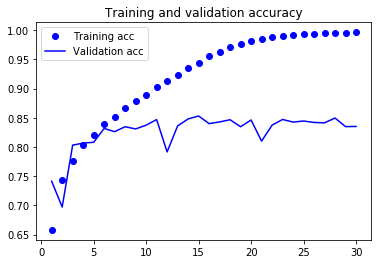

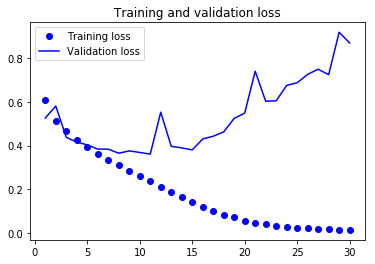

In [9]:
plot_accuracy_and_loss(history)

In [10]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=50,
    class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=90)
print('test acc:', test_acc)

Found 4500 images belonging to 2 classes.
test acc: 0.8406666629844242


## Add dropout

In [11]:
from keras import layers, models, optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5)) # Note the change that we added dropout here
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [12]:
from keras.preprocessing.image import ImageDataGenerator

# Rescale pixel values from [0, 255] to [0, 1]
train_datagen = ImageDataGenerator(rescale=1./255) 
test_datagen = ImageDataGenerator(rescale=1./255)

# The list of classes will be automatically inferred from the subdirectory names/structure under train_dir
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224), # resize all images to 224 x 224
    batch_size=50,
    class_mode='binary') # because we use binary_crossentropy loss we need binary labels

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224), # resize all images to 224 x 224
    batch_size=50,
    class_mode='binary')

Found 16000 images belonging to 2 classes.
Found 4500 images belonging to 2 classes.


In [13]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=320, # 320 x 50 == 16000
    epochs=30,
    validation_data=validation_generator,
    validation_steps=90) # 90 x 50 == 4500

Epoch 1/30
320/320 [==============================] - 46s 145ms/step - loss: 0.6166 - acc: 0.6449 - val_loss: 0.5348 - val_acc: 0.7378
Epoch 2/30
320/320 [==============================] - 46s 143ms/step - loss: 0.5280 - acc: 0.7364 - val_loss: 0.4777 - val_acc: 0.7733
Epoch 3/30
320/320 [==============================] - 46s 143ms/step - loss: 0.4804 - acc: 0.7685 - val_loss: 0.5058 - val_acc: 0.7413
Epoch 4/30
320/320 [==============================] - 46s 143ms/step - loss: 0.4425 - acc: 0.7960 - val_loss: 0.4131 - val_acc: 0.8122
Epoch 5/30
320/320 [==============================] - 46s 144ms/step - loss: 0.4114 - acc: 0.8124 - val_loss: 0.3995 - val_acc: 0.8193
Epoch 6/30
320/320 [==============================] - 46s 143ms/step - loss: 0.3877 - acc: 0.8273 - val_loss: 0.4153 - val_acc: 0.8080
Epoch 7/30
320/320 [==============================] - 46s 143ms/step - loss: 0.3642 - acc: 0.8368 - val_loss: 0.3686 - val_acc: 0.8360
Epoch 8/30
320/320 [==============================] - 4

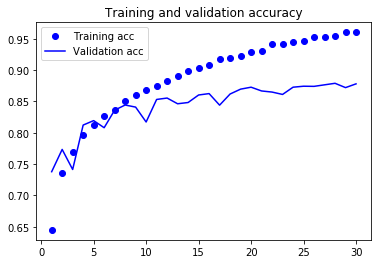

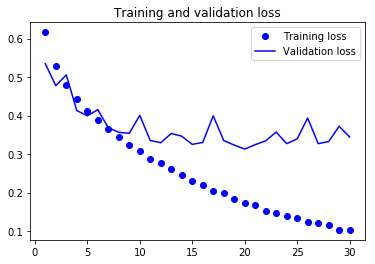

In [14]:
plot_accuracy_and_loss(history)

In [15]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=50,
    class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=90)
print('test acc:', test_acc)

Found 4500 images belonging to 2 classes.
test acc: 0.8791111058659024


## Data augmentation

Generate a number of random transformations on an image and visualize what it looks like.

In [16]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

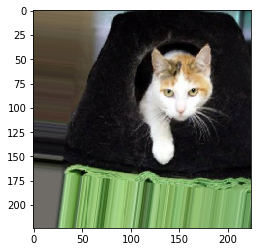

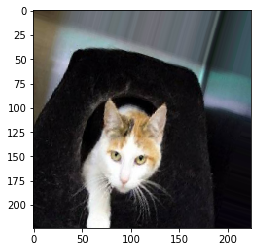

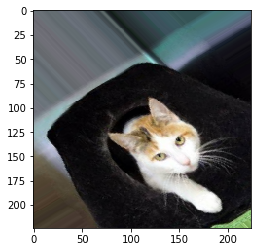

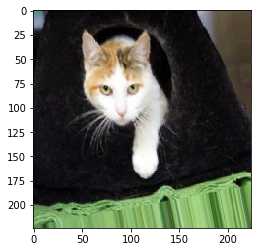

In [19]:
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

img_path = fnames[4] # Choose one image to augment

img = image.load_img(img_path, target_size=(224, 224)) # load image and resize it

x = image.img_to_array(img) # Convert to a Numpy array with shape (224, 224, 3)

x = x.reshape((1,) + x.shape)

# Generates batches of randomly transformed images.
# Loops indefinitely, so you need to break once four images have been created
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

## Build a model with data augmentation

### Augmented data show training images more than once per epoch (3x per epoch)

Idea here is we're increasing the size of the training set by making changes to existing images

In [20]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [21]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255) # Note that validation data should not be augmented

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=50,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=50,
    class_mode='binary')

Found 16000 images belonging to 2 classes.
Found 4500 images belonging to 2 classes.


In [22]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=960, # 960 x 50 = 48000 (we are showing different augmented images more than once per epoch)
    epochs=30,
    validation_data=validation_generator,
    validation_steps=90) # 90 x 50 == 4500

Epoch 1/30
960/960 [==============================] - 411s 429ms/step - loss: 0.6202 - acc: 0.6428 - val_loss: 0.5285 - val_acc: 0.7413
Epoch 2/30
960/960 [==============================] - 410s 427ms/step - loss: 0.5495 - acc: 0.7141 - val_loss: 0.5082 - val_acc: 0.7447
Epoch 3/30
960/960 [==============================] - 409s 426ms/step - loss: 0.5102 - acc: 0.7461 - val_loss: 0.4518 - val_acc: 0.7989
Epoch 4/30
960/960 [==============================] - 414s 431ms/step - loss: 0.4819 - acc: 0.7684 - val_loss: 0.4262 - val_acc: 0.8109
Epoch 5/30
960/960 [==============================] - 410s 427ms/step - loss: 0.4615 - acc: 0.7837 - val_loss: 0.4194 - val_acc: 0.8229
Epoch 6/30
960/960 [==============================] - 411s 428ms/step - loss: 0.4361 - acc: 0.7962 - val_loss: 0.3927 - val_acc: 0.8207
Epoch 7/30
960/960 [==============================] - 411s 428ms/step - loss: 0.4130 - acc: 0.8089 - val_loss: 0.3370 - val_acc: 0.8573
Epoch 8/30
960/960 [============================

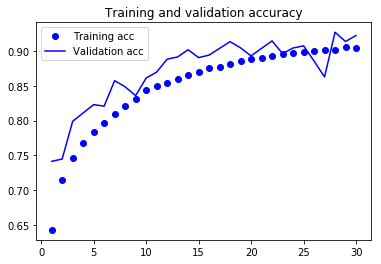

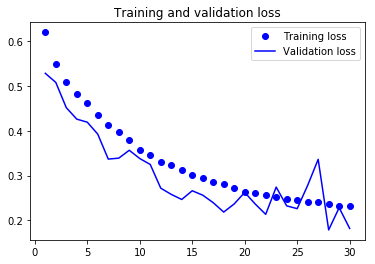

In [23]:
plot_accuracy_and_loss(history)

In [24]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=50,
    class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=90)
print('test acc:', test_acc)

Found 4500 images belonging to 2 classes.
test acc: 0.928444442484114
